In [19]:
import pandas as pd
df = pd.read_csv('streamflix_user_data_15000.csv')
df.head()

,User ID,Registration Date,Current Subscription Status,Date of Premium Subscription,Number of Videos Watched,Total Watch Time,Primary Device,Age Group,Country,Favorite Genre,Number of Customer Support Interactions,Net Promoter Score,Engagement Trend,Social Shares
0,1001,2023-09-19,Premium,2023-09-23,96,138.7,Desktop,45-54,Brazil,Sci-Fi,1,8,Decreasing,3
1,1002,2023-09-27,Premium,2023-09-30,63,79.4,Mobile,18-24,USA,Comedy,3,4,Increasing,2
2,1003,2023-05-10,Premium,2023-06-07,46,55.4,Desktop,25-34,Canada,Comedy,3,5,Stable,0
3,1004,2023-09-05,Premium,2023-09-07,87,72.9,Mobile,25-34,Spain,Comedy,3,6,Increasing,3
4,1005,2023-05-24,Premium,2023-06-18,121,118.4,Tablet,25-34,Canada,Romance,5,3,Increasing,4


### Conversion of Date Fields and Creation of Daily Conversion DataFrame

In this step, as a data analyst, I performed the following tasks:

1. **Converted Date Columns to Datetime**: 
   - The columns `Registration Date` and `Date of Premium Subscription` were converted to datetime format to enable time-series analysis and facilitate date-based operations.

2. **Identified the Date Range**:
   - The earliest and latest dates across the dataset were identified to determine the full range of dates present in the data.

3. **Generated a Date Index**:
   - Using the identified date range, a complete sequence of daily dates was created, ensuring no missing dates in the time series.

4. **Created a New DataFrame for Daily Analysis**:
   - A new DataFrame, `conv_per_day`, was initialized with the daily date index. This DataFrame will serve as the foundation for analyzing conversion trends over time.

The resulting DataFrame (`conv_per_day`) is structured to provide a comprehensive view of daily conversion activity across the dataset.


In [20]:
# Convert date field columns to datetime for further analysis
date_columns = ['Registration Date', 'Date of Premium Subscription']
df[date_columns] = df[date_columns].apply(pd.to_datetime)

start_date = df.select_dtypes('datetime64[ns]').min().min()
end_date = df.select_dtypes('datetime64[ns]').max().max()

dates = pd.date_range(start_date, end_date)

conv_per_day = pd.DataFrame(index=dates)
conv_per_day.index.name = 'Date'
conv_per_day


""
Date
2023-04-01
2023-04-02
2023-04-03
2023-04-04
2023-04-05
...
2023-09-27
2023-09-28
2023-09-29


### Daily Conversion Rate Calculation

In this step, I implemented a function to calculate the daily conversion rate and applied it to generate the overall conversion trend:

1. **Function `conv_calculator`**:
   - This function calculates the conversion rate for a specific date. (only conversions in last-30days because all premuim users has been converted in this duration) 
   - It optionally filters the data by a specific categorical column (`filter_col`) and its value (`value`), enabling analysis of conversion trends across specific segments (e.g., age group, country, or device type).
   - The conversion rate is computed as the number of premium subscriptions on a given date divided by the number of eligible free users on that date.

2. **Overall Conversion Rate**:
   - For each date in the `conv_per_day` DataFrame's index, the `conv_calculator` function was applied to compute the daily total conversion rate.
   - The results were stored in a new column named `Total Conversion Rate`.

This analysis allows us to observe the overall trend of conversion rates over time and lays the groundwork for deeper analysis, such as identifying the impact of specific factors or interventions.


In [21]:
import pandas as pd


def conv_calculator(date, filter_col=None, value=None):
    
    # Define the last 30 days range ending at the given date
    last_30days = pd.date_range(end=date, periods=30, freq='D')

    # Filter users who registered within the last 30 days
    if filter_col and value:
        last_30days_users = df[
            (df['Registration Date'].isin(last_30days)) & (df[filter_col] == value)
        ]
    else:
        last_30days_users = df[df['Registration Date'].isin(last_30days)]

    # Filter premium users among those who registered within the last 30 days
    premium_users = last_30days_users[last_30days_users['Current Subscription Status'] == 'Premium']

    # Safeguard against division by zero
    if last_30days_users.shape[0] == 0:
        return 0  # Return 0% conversion rate if no users in the last 30 days
    
    # Calculate the conversion rate
    conversion_rate = premium_users.shape[0] / last_30days_users.shape[0]
    
    return conversion_rate

# Assuming 'conv_per_day' is a DataFrame or Series with a valid date index
conv_per_day['Total Conversion Rate'] = [
    conv_calculator(date) for date in conv_per_day.index
]


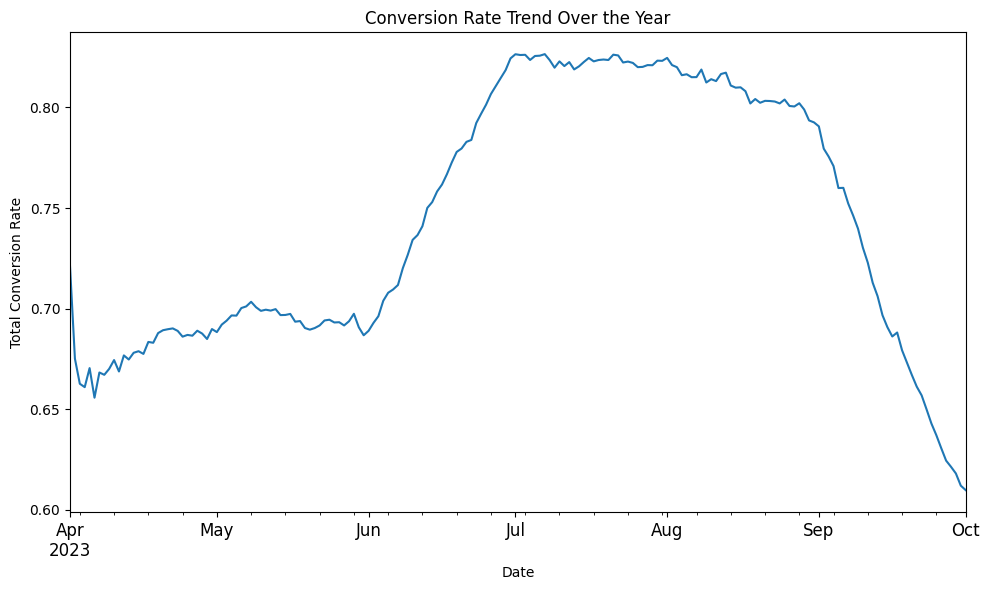

In [22]:
import matplotlib.pyplot as plt

# Plotting the conversion rate trend
conv_per_day['Total Conversion Rate'].plot(kind='line', title='Conversion Rate Trend Over the Year', figsize=(10, 6))

# Adding labels
plt.xlabel('Date')
plt.ylabel('Total Conversion Rate')

# Rotating x-axis labels for readability
plt.xticks(rotation=0, fontsize=12)

# Adjusting layout to prevent clipping
plt.tight_layout()

# Displaying the plot
plt.show()


### Analysis of the Conversion Rate Trend

**Date Range**: April 2023 to October 2023
**Conversion Rate Range**: 0.60 to 0.85

### Observations:
1. **Initial Phase (Apr-May 2023)**: 
   - Gradual increase from 0.65.

2. **Growth Phase (Jun-Aug 2023)**:
   - Peaks around 0.82.
   - Indicates successful conversion efforts.

3. **Decline Phase (Sep-Oct 2023)**:
   - Sharp drop to around 0.61.
   - Possible issues or challenges.

### Recommendations:
- **Review Successful Campaigns**: Analyze what worked during the growth phase.
- **Investigate Decline**: Identify causes for the drop and address them.
- **Continuous Improvement**: Keep enhancing user experience to sustain conversions.

# Calculate Conversion Rates for Subcategories in Categorical Columns

## Objective
Group the daily conversion rates by various subcategories within categorical columns (`Primary Device`, `Age Group`, `Country`, `Favorite Genre`) and organize them for further analysis.

## Process
1. **Identify Subcategories:**
   - Extract unique values (subcategories) from each categorical column.

2. **Calculate Conversion Rates:**
   - Use the `conv_calculator` function to compute daily conversion rates for each subcategory.

3. **Organize Results:**
   - Store the conversion rates in a `MultiIndex` DataFrame with structure `[filter_col, sub_col]`.
   - Combine the conversion rates for subcategories with the existing daily conversion DataFrame.
   - Save the grouped results in the `conv_per_groups` dictionary for each categorical column.


In [23]:
categorical_columns = ['Primary Device', 'Age Group', 'Country', 'Favorite Genre']
conv_per_groups = {}

for filter_col in categorical_columns:
    
    sub_cols = df[filter_col].unique()
    columns = pd.MultiIndex.from_product([[filter_col], sub_cols])
    
    col_conv_df = pd.DataFrame(index=conv_per_day.index, columns=columns)
    
    for sub_col in sub_cols:
        
        conversions = [conv_calculator(date, filter_col=filter_col, value=sub_col) for date in conv_per_day.index]
        col_conv_df[(filter_col, sub_col)] = conversions
    
    conv_group = pd.concat([conv_per_day, col_conv_df], axis=1)
    conv_per_groups[filter_col] = conv_group
    


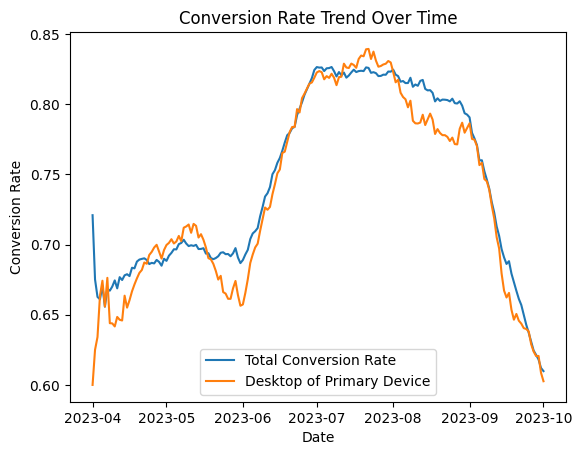

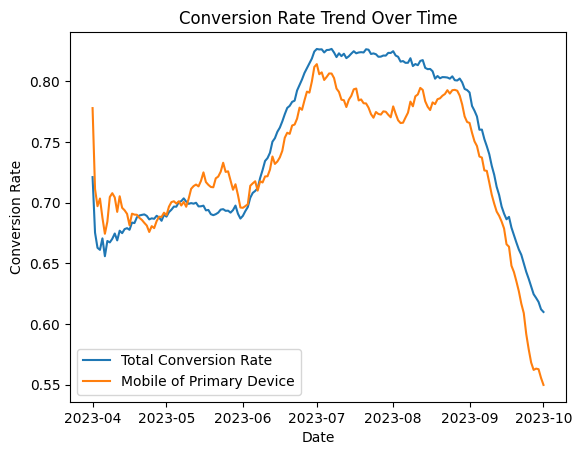

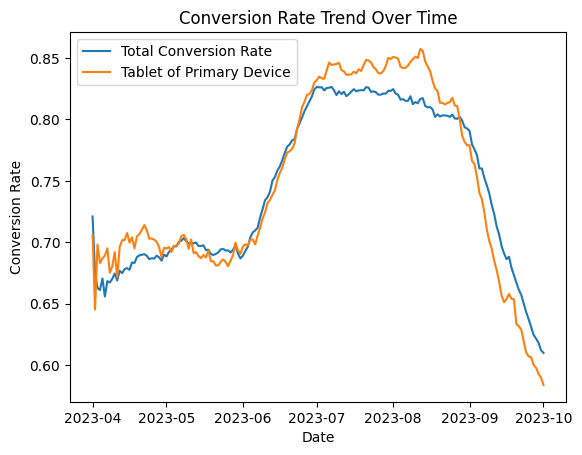

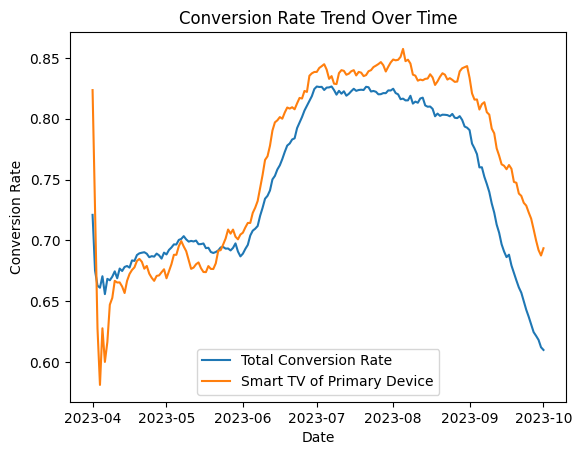

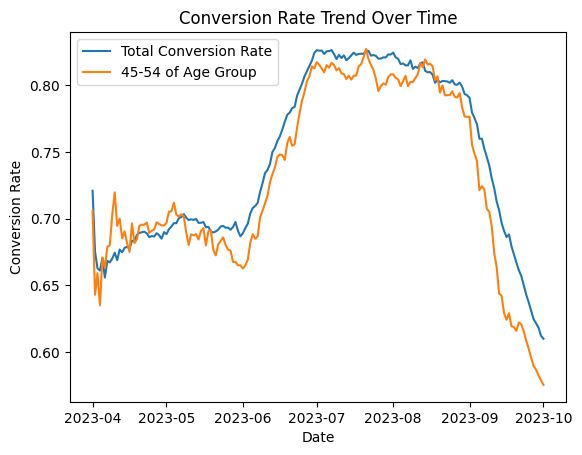

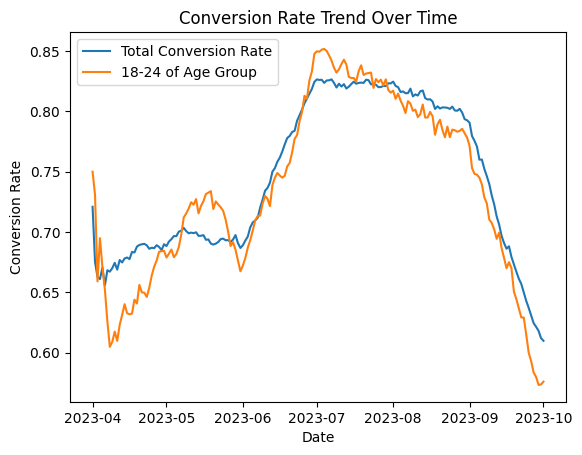

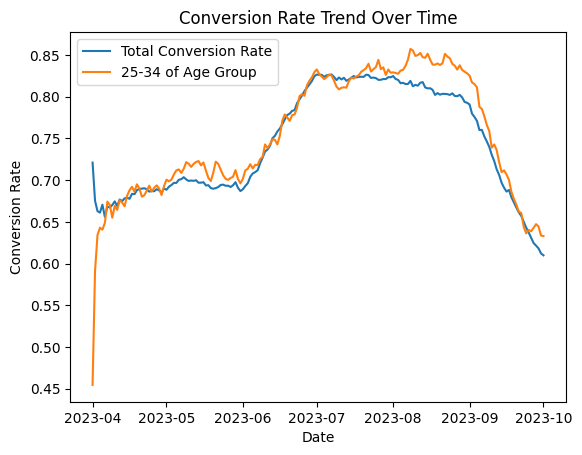

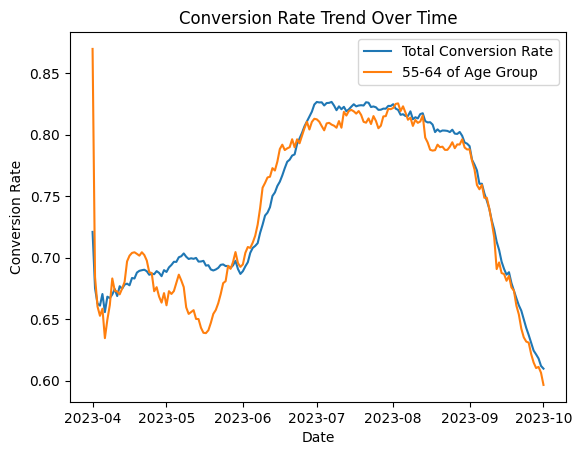

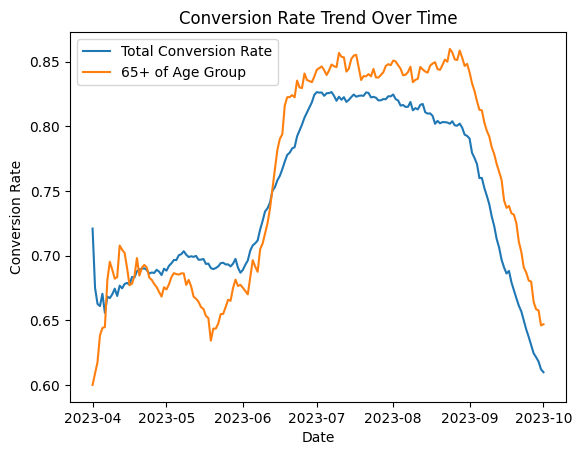

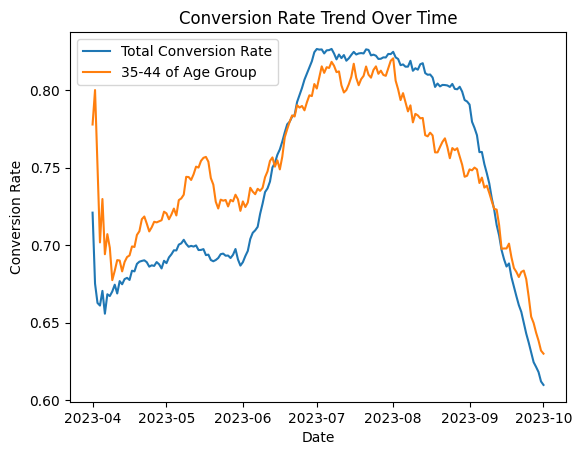

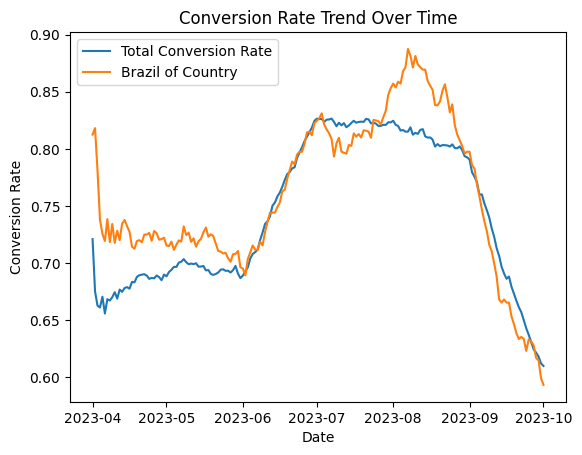

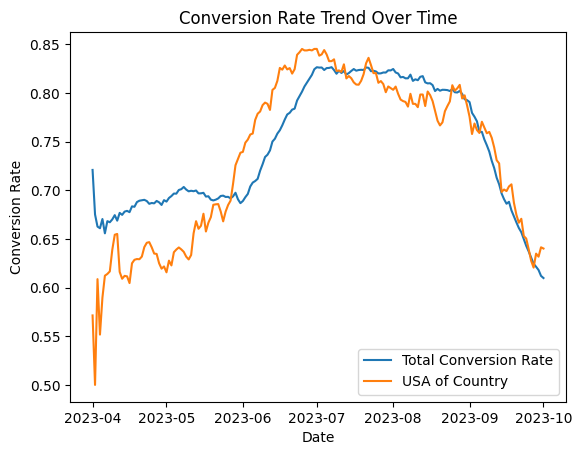

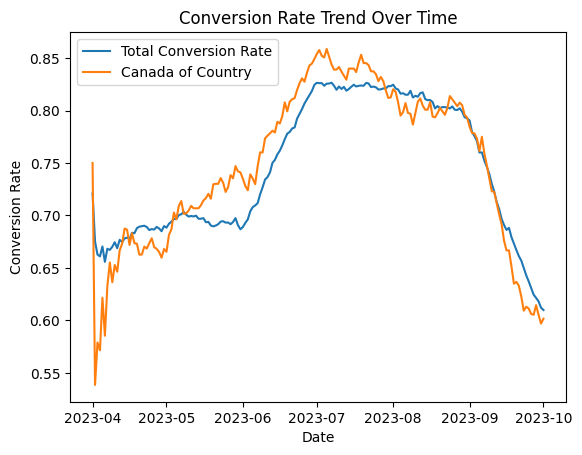

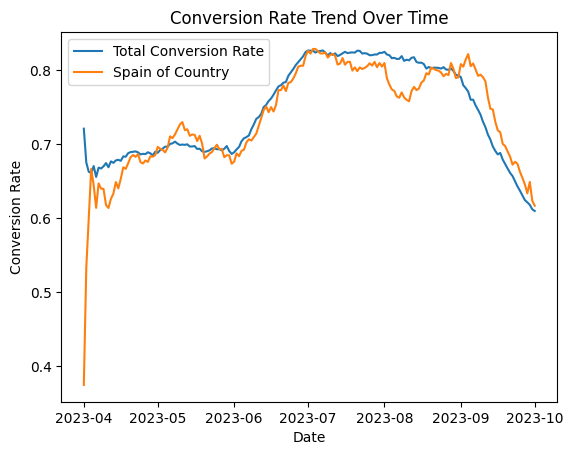

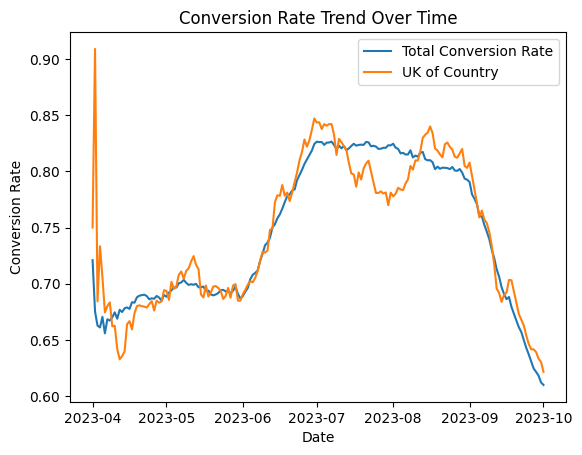

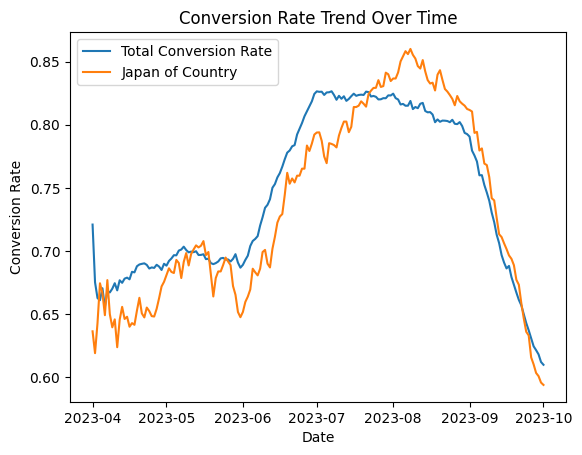

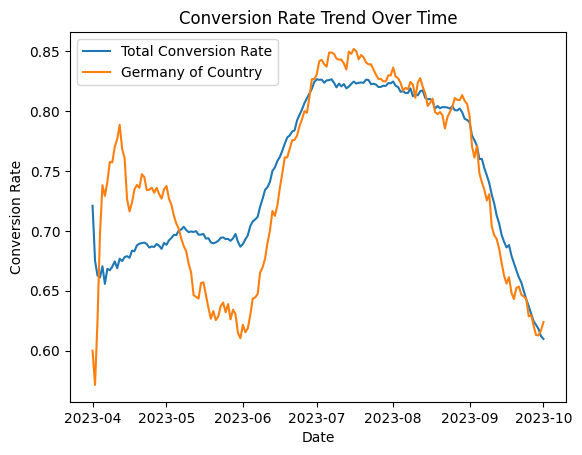

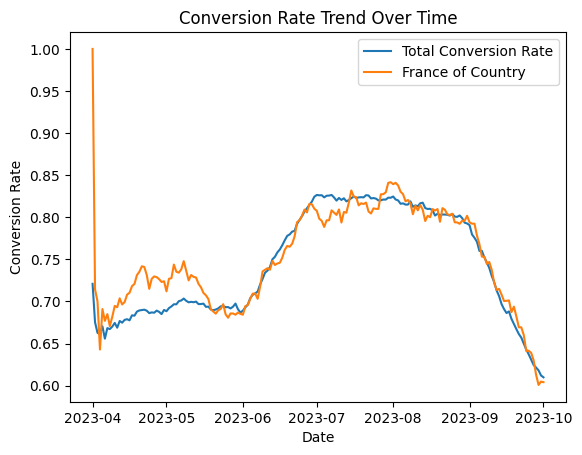

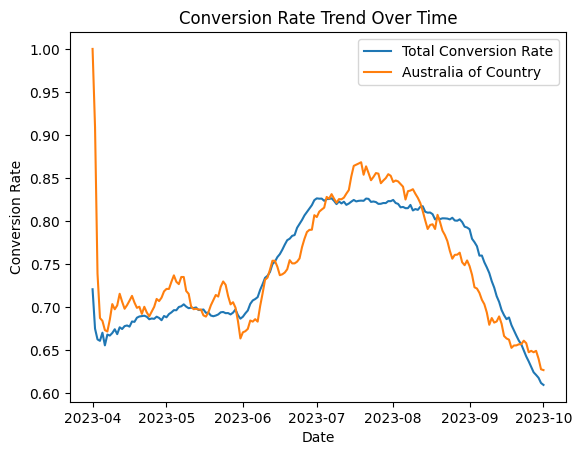

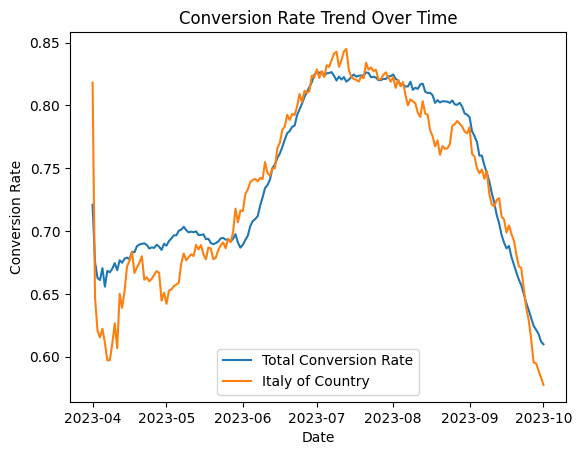

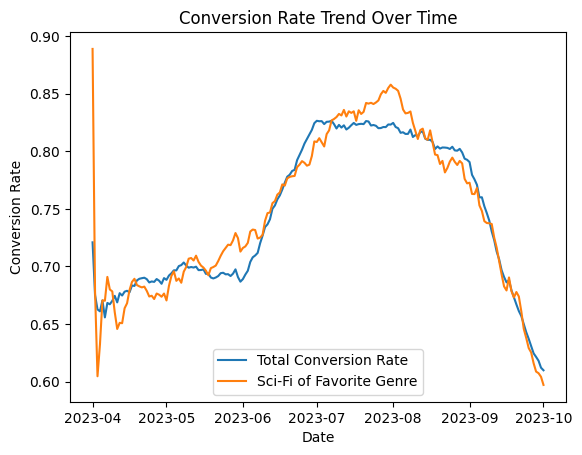

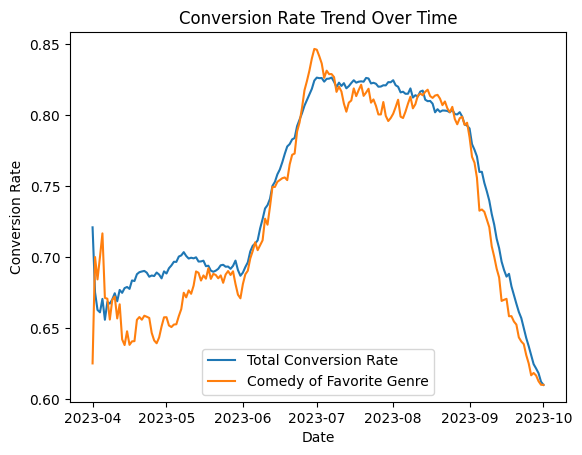

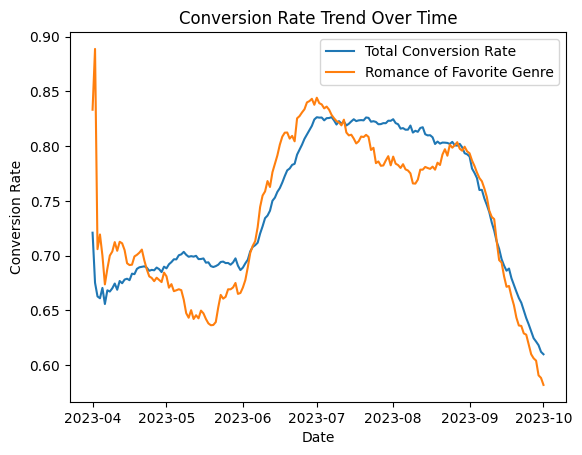

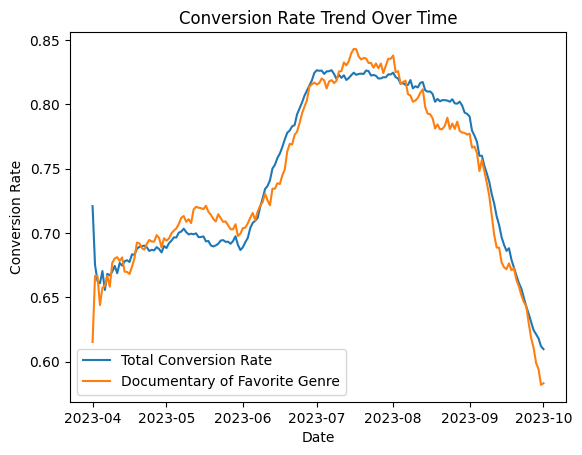

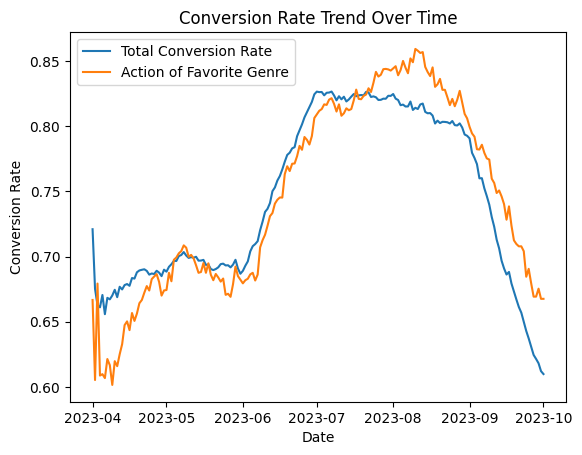

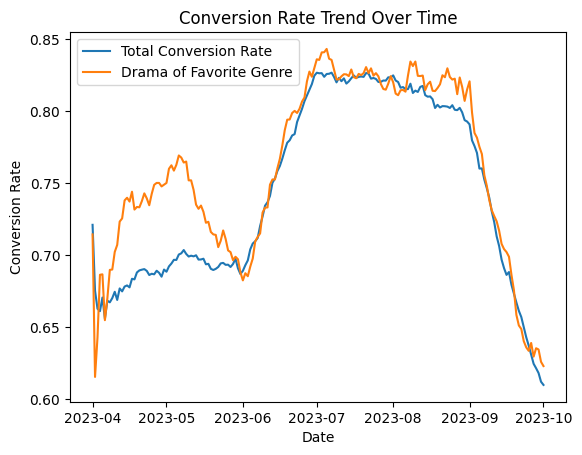

In [24]:
for conv_group in conv_per_groups.values():

    # Plot each column with a specific color
    for column in conv_group.columns[1: ]:
        
        plt.plot(conv_group.index, conv_group[['Total Conversion Rate', column]], label=('Total Conversion Rate', f'{column[1]} of {column[0]}'))

        # Adding labels and title
        plt.xlabel('Date')
        plt.ylabel('Conversion Rate')
        plt.title('Conversion Rate Trend Over Time')

        # Adding a legend
        plt.legend()

        # Display the plot
        plt.show()



In [27]:
end_date = conv_per_day.index[-1]

last_month_conversion_rate = conv_calculator(end_date)

0.6098360655737705